In [6]:
%load_ext autoreload

# Traces simulator v2

In [71]:
%autoreload
from tracer.simulator import TraceSimulator

sim = TraceSimulator(
    number_towers=200,
    number_users=100,
    number_cycles=24,
    expander=1,
    sigma=0.005,
    vel_friction=0.9,
#     method='distance_square',
#     verbose=True,
)

## Generate random user traces

In [72]:
sim.generate()

In [73]:
sim.traces.shape

(100, 24)

## Plot generated results

### Towers positions

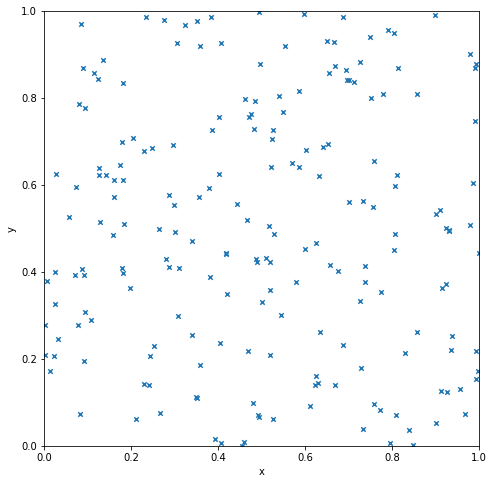

In [74]:
sim.towers_manager.plot_towers(annotate_towers=False);

### User trace

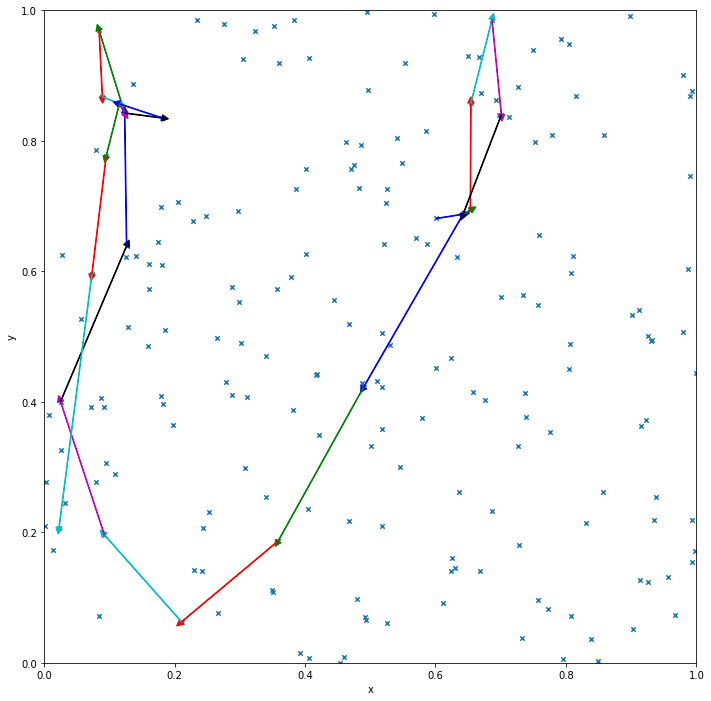

In [75]:
sim.towers_manager.plot_user_trace(sim.traces[60], annotate_towers=False)

In [76]:
sim.aggregated_data.shape

(24, 200)

# Trajectory recovery

In [102]:
%autoreload
import numpy as np
from tracer.recover import TrajectoryRecovery

tr = TrajectoryRecovery(
    number_users=100,
    towers=sim.towers,
    aggregated_data=sim.aggregated_data,
    vel_friction=0.9
)

In [103]:
tr.build_distribution_matrix()

In [104]:
tr.L.shape

(24, 100)

In [105]:
res = tr.trajectory_recovery_generator()

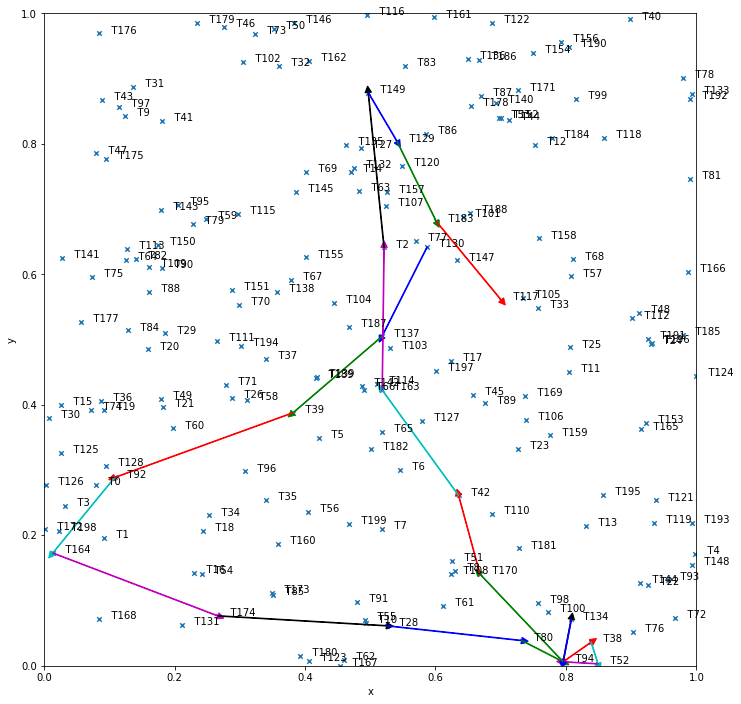

In [106]:
tr.towers_manager.plot_user_trace(res['recovered_trajectories'][:, 4])

In [107]:
mapping, acc = tr.map_traces(sim.traces)

In [108]:
acc

0.13041666666666674

User 6 mapped to simulated trace 37


<Figure size 432x288 with 0 Axes>

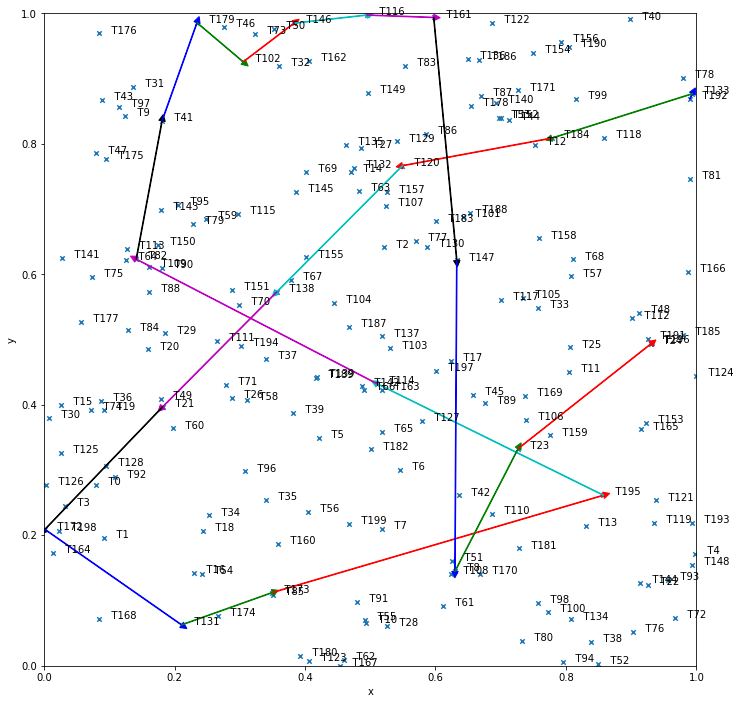

<Figure size 432x288 with 0 Axes>

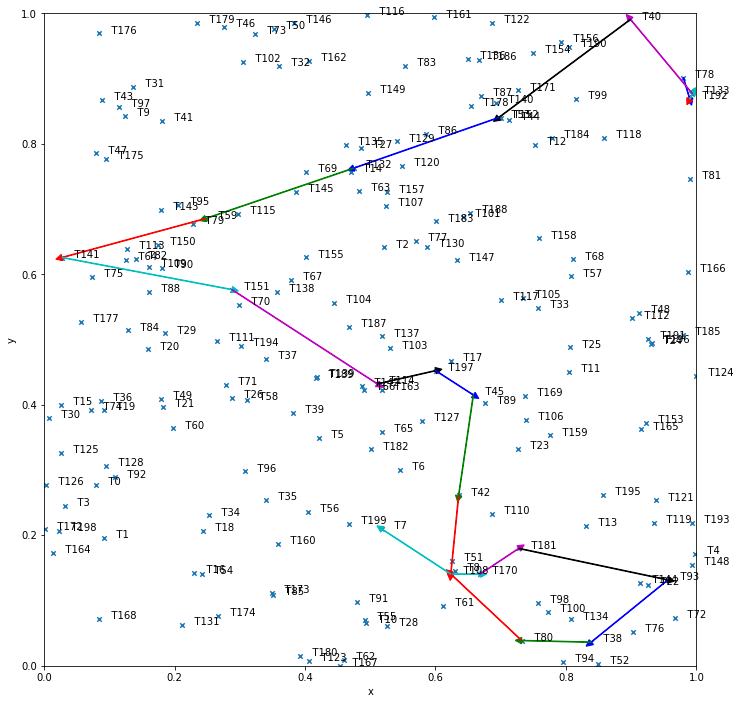

In [98]:
user = 6
recovered_trace = tr.S.T[user]
print(f'User {user} mapped to simulated trace {mapping[user]}')
mapped_trace = sim.traces[mapping[user]]

import matplotlib.pyplot as plt

plt.figure()
tr.towers_manager.plot_user_trace(recovered_trace)

plt.figure()
tr.towers_manager.plot_user_trace(mapped_trace)